In [1]:
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
import sklearn
print(sklearn.__version__)

1.5.0


In [5]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
print(nltk.__version__)

3.8.1


In [8]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\bossh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\bossh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\bossh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\bossh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\bossh\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [9]:
nltk.download('punkt')  # Tokenizers
nltk.download('wordnet')  # WordNet Lexical Database
nltk.download('stopwords')  # Stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bossh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bossh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bossh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

In [12]:
pip list

Package                           Version
--------------------------------- ------------
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
async-lru                         2.0.4
atomicwrites             

In [15]:
import pandas as pd 
import re 
import seaborn as sns 
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline 

In [16]:
#loading data 

In [17]:
df=pd.read_csv('twitter_training.csv')

In [18]:
pd.read_csv('twitter_training.csv')

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [19]:
df1=pd.read_csv('twitter_validation.csv')

In [20]:
pd.read_csv('twitter_validation.csv')

,Tweet ID,Entity,Sentiment,Tweet Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


# EDA

In [21]:
df.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


df1.head()

In [22]:
df.shape

(74681, 4)

In [23]:
df1.shape

(999, 4)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74681 non-null  int64 
 1   Entity         74681 non-null  object
 2   Sentiment      74681 non-null  object
 3   Tweet Content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [25]:
df.isnull().sum().sum()

686

In [26]:
df.isnull().sum()

Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [27]:
df['Tweet Content'].fillna(df['Tweet Content'], inplace=True)

In [28]:
df.isnull().sum()

Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [29]:
df1.isnull().sum().sum()

0

In [30]:
df1.isnull().sum()

Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64

In [49]:
df["Tweet Content"].value_counts()

Tweet Content
At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care.    172
It is not the first time that the EU Commission has taken such a step.                                                                                                                                                                                                172
                                                                                                                                                                                                                                                                      172
<unk>                                                                                                                                                                                       

# Data preprocessing

In [62]:
import re

def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)  # Remove hashtags
    tweet = re.sub(r'\d+', '', tweet)  # Remove numbers
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation
    tweet = tweet.lower()  # Convert to lowercase
    return tweet

df['Cleaned_Tweet'] = df['Sentiment'].apply(clean_tweet)


In [66]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/626.3 kB 131.3 kB/s eta 0:00:05
   - ------------------------------------- 30.7/626.3 kB 262.6 kB/s eta 0:00:03
   ----- --------------------------------- 92.2/626.3 kB 476.3 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/626.3 kB 476.3 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/626.3 kB 476.3 kB/s eta 0:00:02
   ------------- ------------------------ 225.3/626.3 kB 765.3 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/626.3 kB 765.3 kB/s eta 0:00:01
   ---------------------- --------------- 368.6/626.3 kB 919.0 kB/s eta 0:00:01
   ---------------------- --------------- 368.6/626.3 kB 919.0 kB/s eta 0:00:01
   -------------------------------- ------- 501.8/626.3 kB 1.0 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/626.3 k

# Sentiment Analysis

In [69]:
from textblob import TextBlob

In [70]:
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Cleaned_Tweet'].apply(get_sentiment)

# Display the sentiment distribution
print(df['Sentiment'].value_counts())


Sentiment
Negative    35532
Positive    20831
Neutral     18318
Name: count, dtype: int64


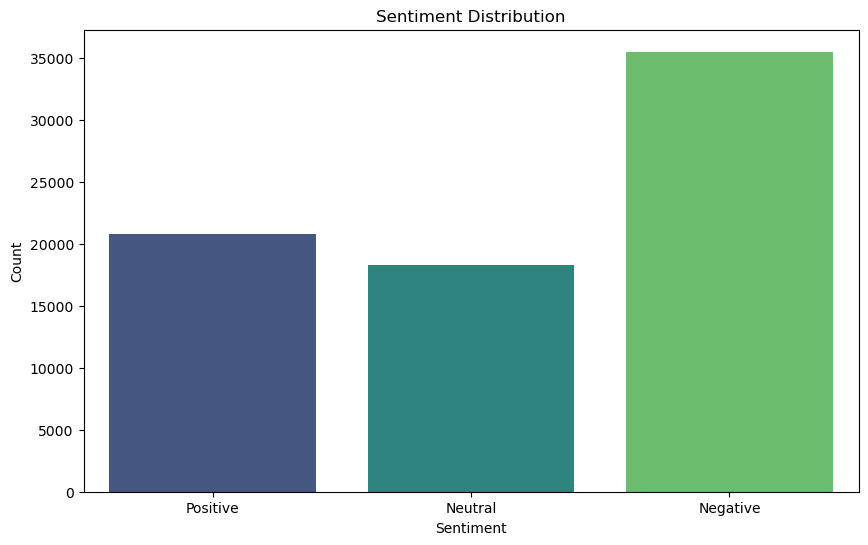

In [79]:
# Sentiment distribution plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# If the dataset contains timestamp information, convert it to datetime
# and visualize the sentiment over time.
if 'timestamp' in df.columns:
    df['Date'] = pd.to_datetime(df['timestamp']).dt.date
    sentiment_over_time = df.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=sentiment_over_time)
    plt.title('Sentiment Analysis of Tweets Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.legend(['Negative', 'Neutral', 'Positive'])
    plt.show()


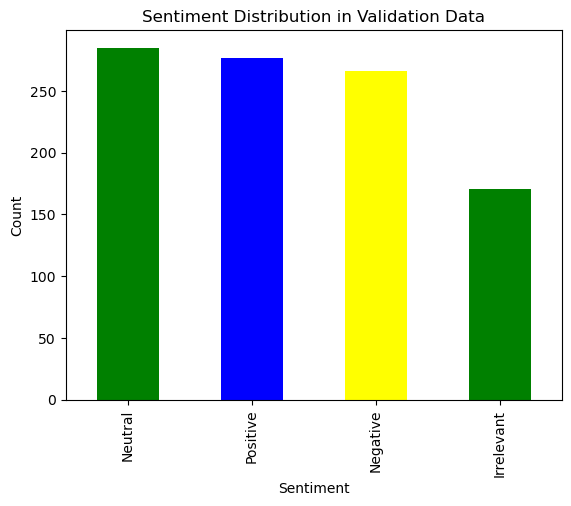

In [88]:
sentiment_distribution = df1['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'yellow'])
plt.title('Sentiment Distribution in Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# TdifVect , NB

In [80]:
from sklearn.naive_bayes import MultinomialNB

In [81]:
vect = TfidfVectorizer(max_features=10000)
X_train = vect.fit_transform(df["Sentiment"])
X_val = vect.transform(df1["Sentiment"])

model = MultinomialNB(alpha=1.5)
model.fit(X_train, df['Sentiment'])

MultinomialNB(alpha=1.5)

# predictions

In [83]:
from sklearn.metrics import f1_score

f1 = f1_score(df1['Sentiment'], predictions,average='micro')
print(f'F1 Score: {f1:.2f}')     

F1 Score: 0.83


In [95]:
print('Classification Report:\n', classification_report(df1['Sentiment'], predictions))
print('Confusion Matrix:\n', confusion_matrix(df1['Sentiment'], predictions))
print ('accuracy_score:n', accuracy_score(df1['Sentiment'], predictions))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00       171
    Negative       0.61      1.00      0.76       266
     Neutral       1.00      1.00      1.00       285
    Positive       1.00      1.00      1.00       277

    accuracy                           0.83       999
   macro avg       0.65      0.75      0.69       999
weighted avg       0.72      0.83      0.76       999

Confusion Matrix:
 [[  0 171   0   0]
 [  0 266   0   0]
 [  0   0 285   0]
 [  0   0   0 277]]
accuracy_score:n 0.8288288288288288


C:\Users\bossh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bossh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bossh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
